In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1) 데이터 불러오기

In [ ]:
custoemrs_df = pd.read_csv('../data/olist_customers_dataset.csv')
geolocation_df = pd.read_csv('../data/olist_geolocation_dataset.csv')
order_items_df = pd.read_csv('../data/olist_order_items_dataset.csv')
order_payments_df = pd.read_csv('../data/olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('../data/olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('../data/olist_orders_dataset.csv')
products_df = pd.read_csv('../data/olist_products_dataset.csv')
sellers_df = pd.read_csv('../data/olist_sellers_dataset.csv')
category_df = pd.read_csv('../data/product_category_name_translation.csv')
geolocation_df2 = pd.read_csv('../data/olist_geolocation_dataset2.csv')
order_reviews_df2 = pd.read_csv('../data/olist_order_reviews_dataset2.csv')

In [ ]:
# 회원
print(len(custoemrs_df))
custoemrs_df.head(2)

99441


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [ ]:
print(len(custoemrs_df['customer_id'].unique()))
print(len(custoemrs_df['customer_unique_id'].unique()))

99441
96096


In [ ]:
custoemrs_df[custoemrs_df['customer_unique_id']=='b6c083700ca8c135ba9f0f132930d4e8']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
132,f7c5afab273b47ab517e096e0219b932,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
679,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP


In [ ]:
# 지리적 위치
print(len(geolocation_df))
geolocation_df.head(2)

1000163


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [ ]:
# 주문 아이템
print(len(order_items_df))
order_items_df.head(2)

112650


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [ ]:
# 주문 결제
print(len(order_payments_df))
order_payments_df.head(2)

103886


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [ ]:
# 주문 리뷰
print(len(order_reviews_df))
order_reviews_df.head(2)

99224


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [ ]:
# 주문
print(len(orders_df))
orders_df.head(2)

99441


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [ ]:
orders_df[orders_df['order_status']=='approved']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44897,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaN,NaN,2017-03-01 00:00:00
88457,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaN,NaN,2017-05-22 00:00:00


In [ ]:
# 제품
print(len(products_df))
products_df.head(2)

32951


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [ ]:
len(products_df['product_category_name'].unique())

74

In [ ]:
# 판매자
print(len(sellers_df))
sellers_df.head(2)

3095


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [ ]:
# 카테고리
print(len(category_df))
category_df.head(2)

71


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [ ]:
# 지리적 위치2
print(len(geolocation_df2))
geolocation_df2.head(2)

999999


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,nation
0,1037,-23.545621,-46.639292,sao paulo,SP,brazil
1,1046,-23.546081,-46.644820,sao paulo,SP,brazil


## 2) EDA

In [ ]:
# countplot
def draw_count_graph_base(df, col):
    sns.countplot(data=df, x=col);

def draw_count_graph(df, col):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index);

def draw_count_graph_order(df, col, order_list):
    sns.countplot(data=df, x=col, order=order_list);

def draw_count_graph_top10(df, col):
    sns.countplot(data=df, x=col, order=df[col].value_counts().head(10).index);

# 가로
def draw_count_graph_y_top10(df, col):
    sns.countplot(data=df, y=col, order=df[col].value_counts().head(10).index);

# 값 표시
def input_value(ax):
    for p in ax.patches:
        ax.text(p.get_x() + (p.get_width()/2),
                p.get_y() + p.get_height(),
                f'{p.get_height():.0f}',
                ha='center')
# 값 표시(가로)
def input_value_y(ax):
    for p in ax.patches:
        x, y, width, height = p.get_bbox().bounds
        ax.text(width*1.01, y+height/2, f'{width:.0f}', va='center')

# boxplot
def draw_boxplot(df, col):
    sns.boxplot(df, y=col);

def draw_boxplot_hue(df, col, hue):
    sns.boxplot(df, y=col, hue=hue);

# barplot
def draw_barplot(df, col, order_list):
    sns.barplot(data=df, x=df.index, y=col, order=order_list);

# countplot and pie
def draw_count_pie(df, col, title1, title2):
    f, ax = plt.subplots(1,2, figsize=(12,5));
    plt.subplot(121)
    plt.title(title1)
    draw_count_graph(df, col)
    input_value(ax[0])

    sum_cnt = df[col].value_counts()
    rate_cnt = sum_cnt / len(df[col]) * 100
    plt.subplot(122)
    plt.title(title2)
    plt.pie(rate_cnt,
            labels=df[col].unique(),
            autopct='%.2f%%');

### (1) custoemrs

In [ ]:
print(len(custoemrs_df))
print('customer_id : ', len(custoemrs_df['customer_id'].unique()))
print('customer_unique_id : ', len(custoemrs_df['customer_unique_id'].unique()))
custoemrs_df.head(2)
# customer_unique_id로 여러개의 customer_id를 가진 사람들이 있다. (3345명이 중복으로 가지고 있음)

99441
customer_id :  99441
customer_unique_id :  96096


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [ ]:
custoemrs_df[custoemrs_df['customer_unique_id'].duplicated(keep='first')]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
679,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,299f7b5125c8fbe1761a1b320c34fc7d,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,226d59f9f4b98e228b689eea45d03a6d,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,b1253701171dfb298f52a221f824e45b,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


In [ ]:
print('customer_city : ', len(custoemrs_df['customer_city'].unique()))
print('customer_state : ', len(custoemrs_df['customer_state'].unique()))

customer_city :  4119
customer_state :  27


In [ ]:
custoemrs_df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


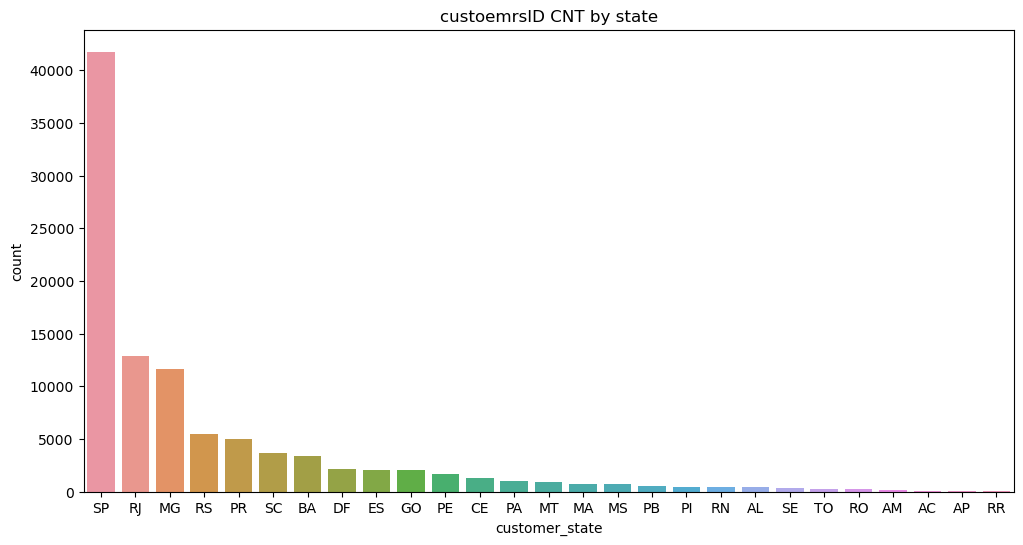

In [ ]:
plt.figure(figsize=(12,6))
plt.title('custoemrsID CNT by state')
draw_count_graph(custoemrs_df, 'customer_state')

- top5 주 : 상파울루(SP), 리우데자네이루(RJ), 벨루오리존치(MG), 포르투알레그리(RS), 쿠리치바(PR)

In [ ]:
len(custoemrs_df['customer_city'].unique())

4119

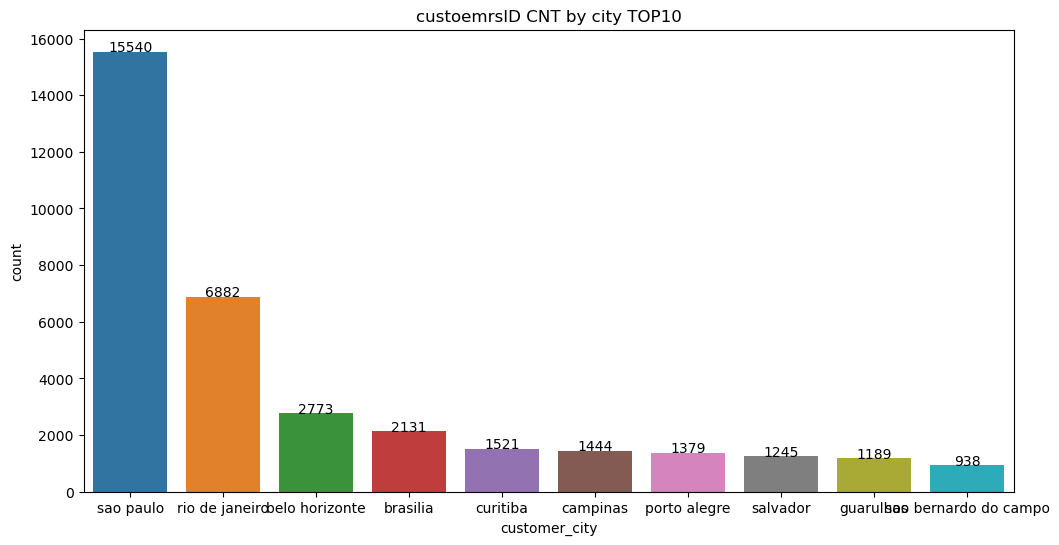

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title('custoemrsID CNT by city TOP10')
draw_count_graph_top10(custoemrs_df, 'customer_city')
input_value(ax)

- top10 city : sao paulo, rio de janeiro, belo Horizonte, brasilia, curitiba, campinas, porto alegre, salvador, guarulhos, são Bernardo do Campo

In [ ]:
custoemrs_df[custoemrs_df['customer_city']=='são paulo']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


### (2) geolocation

In [ ]:
print(len(geolocation_df))
geolocation_df.head(2)

1000163


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


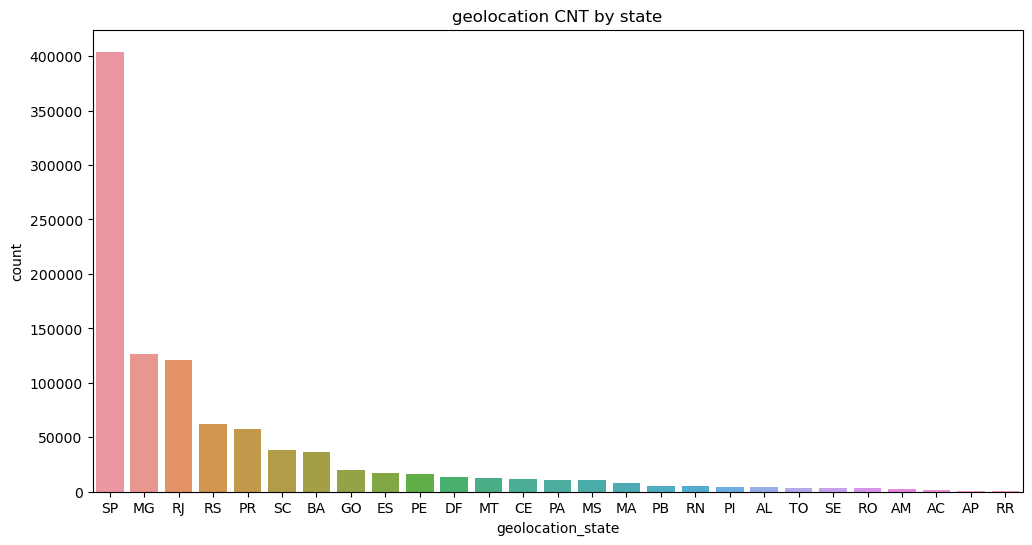

In [ ]:
plt.figure(figsize=(12,6))
plt.title('geolocation CNT by state')
draw_count_graph(geolocation_df, 'geolocation_state')

- geolocation top5 주 : 상파울루(SP), 벨루오리존치(MG), 리우데자네이루(RJ), 포르투알레그리(RS), 쿠리치바(PR)
- customer top5 주 : 상파울루(SP), 리우데자네이루(RJ), 벨루오리존치(MG), 포르투알레그리(RS), 쿠리치바(PR)
- 벨루오리존치(MG), 리우데자네이루(RJ) 순위가 바뀌었지만 미세한 차이라서 의미있어 보이지는 않는다.

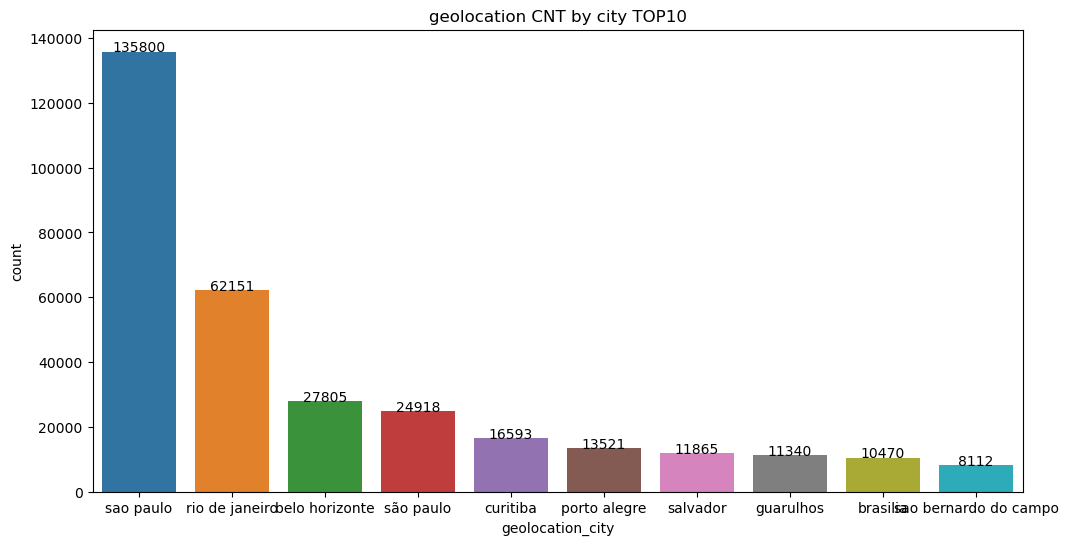

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title('geolocation CNT by city TOP10')
draw_count_graph_top10(geolocation_df, 'geolocation_city')
input_value(ax)

- geolocation top10 city : sao paulo, rio de janeiro, belo Horizonte, são paulo, curitiba, porto alegre, salvador, guarulhos, brasilia, são Bernardo do Campo
- customer top10 city : sao paulo, rio de janeiro, belo Horizonte, brasilia, curitiba, campinas, porto alegre, salvador, guarulhos, são Bernardo do Campo
<br><br>
- geolocation top10 city에서 sao paulo와 são paulo를 이름을 통일시켜야 할 것 같다.
- são paulo를 sao paulo로 변경

In [ ]:
# 값 변경
geolocation_df.loc[geolocation_df['geolocation_city']=='são paulo', 'geolocation_city'] = 'sao paulo'

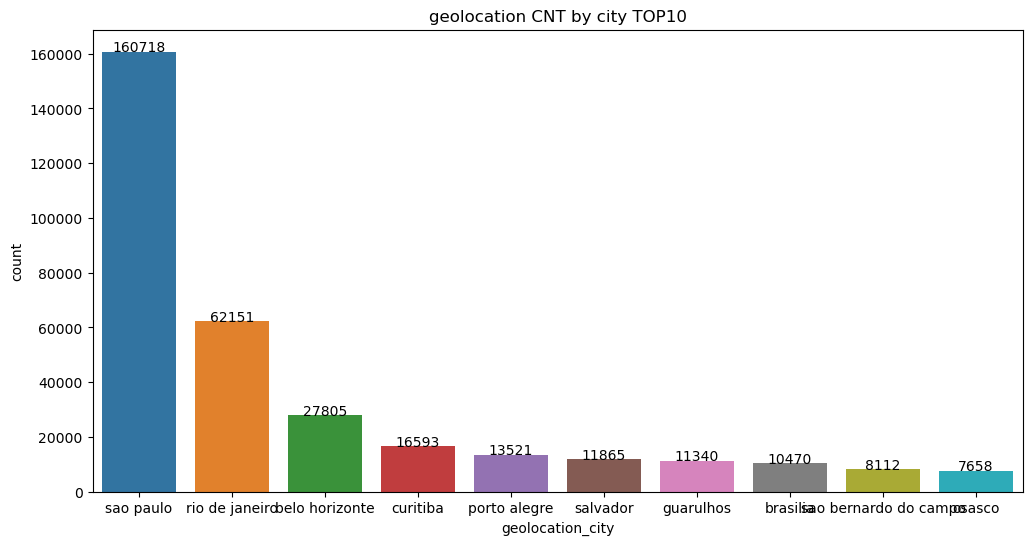

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title('geolocation CNT by city TOP10')
draw_count_graph_top10(geolocation_df, 'geolocation_city')
input_value(ax)

- geolocation top10 city : sao paulo, rio de janeiro, belo Horizonte, curitiba, porto alegre, salvador, guarulhos, brasilia, são Bernardo do Campo, osasco
- customer top10 city : sao paulo, rio de janeiro, belo Horizonte, brasilia, curitiba, campinas, porto alegre, salvador, guarulhos, são Bernardo do Campo

### (3) order items

In [ ]:
print(len(order_items_df))
order_items_df.head(2)

112650


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


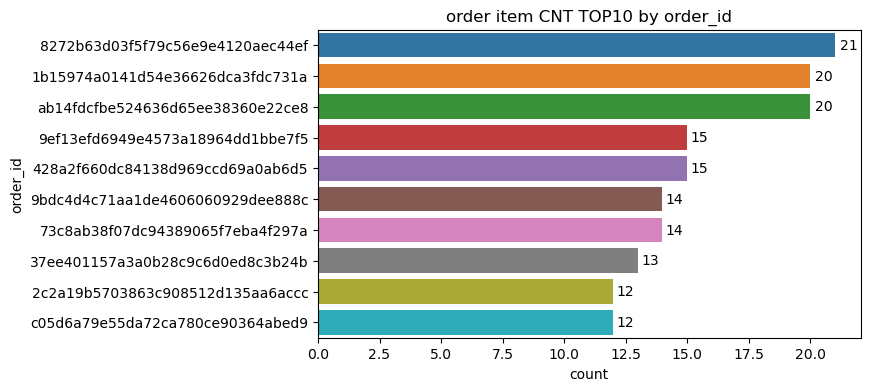

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
plt.title('order item CNT TOP10 by order_id')
draw_count_graph_y_top10(order_items_df, 'order_id')
input_value_y(ax)

- 한 주문에 최고 21개 주문한 건이 있다.

In [ ]:
round(order_items_df.groupby('order_id')['order_item_id'].count().mean(),2)

1.14

- 한 order_id 평균 1.14개 구매했다.

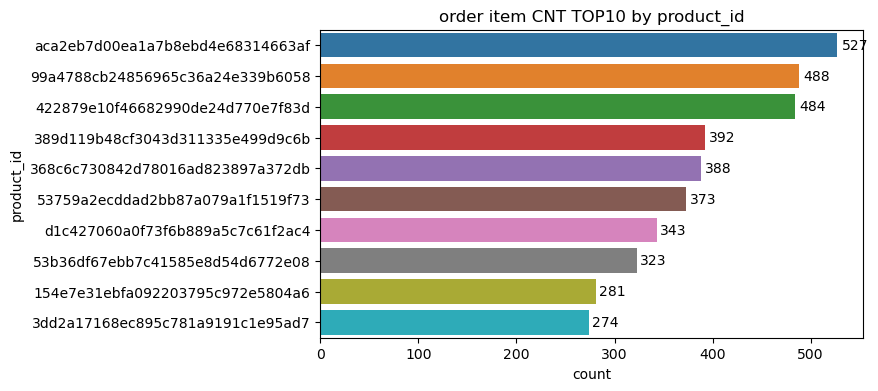

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
plt.title('order item CNT TOP10 by product_id')
draw_count_graph_y_top10(order_items_df, 'product_id')
input_value_y(ax)

- product_id가 aca2eb7d00ea1a7b8ebd4e68314663af 제품이 527개로 가장 많이 팔렸다.

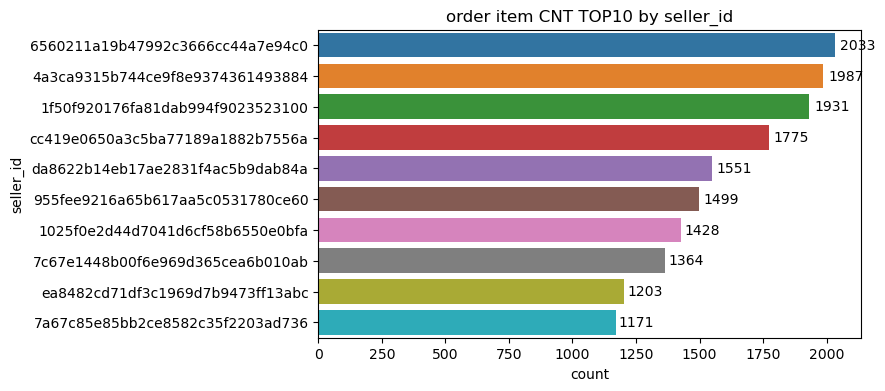

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
plt.title('order item CNT TOP10 by seller_id')
draw_count_graph_y_top10(order_items_df, 'seller_id')
input_value_y(ax)

- seller_id가 6560211a19b47992c3666cc44a7e94c0 인 판매자가 2033개로 가장 많은 제품을 판매했다.

In [ ]:
order_items_df['price_category'] = 0
order_items_df['freight_category'] = 0
order_items_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_category,freight_category
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,0,0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,0,0


In [ ]:
# price_category
for i in range(7000, 0, -1000):
    order_items_df.loc[order_items_df['price']<=i, 'price_category'] = i

# freight_category
for j in range(500, 0, -100):
    order_items_df.loc[order_items_df['freight_value']<=j, 'freight_category'] = j

# 세분화
order_items_df['price_specialize'] = None
order_items_df['freight_specialize'] = None

# price_specialize
for i in range(1000, 0, -100):
    order_items_df.loc[order_items_df['price']<=i, 'price_specialize'] = i

# freight_specialize
for j in range(100, 0, -10):
    order_items_df.loc[order_items_df['freight_value']<=j, 'freight_specialize'] = j

# free freight
order_items_df.loc[order_items_df['freight_value']==0, 'free_freight'] = True
order_items_df.loc[order_items_df['freight_value']>0, 'free_freight'] = False

order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_category,freight_category,price_specialize,freight_specialize,free_freight
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1000,100,100,20,False
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1000,100,300,20,False
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1000,100,200,20,False
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1000,100,100,20,False
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1000,100,200,20,False


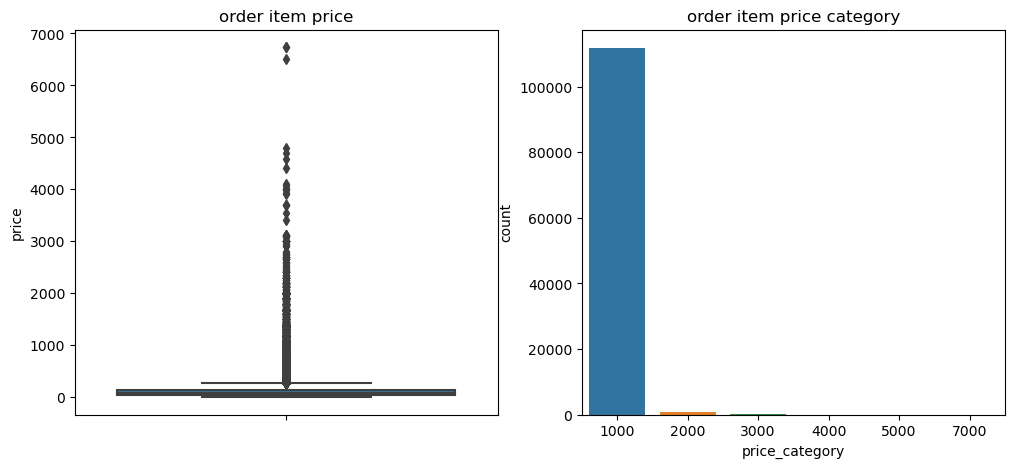

In [ ]:
f, ax = plt.subplots(1,2, figsize=(12,5));
plt.subplot(121)
plt.title('order item price')
draw_boxplot(order_items_df, 'price')
plt.subplot(122)
plt.title('order item price category')
draw_count_graph(order_items_df, 'price_category')


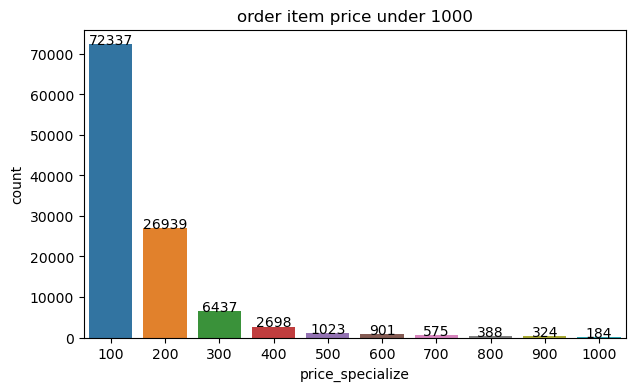

In [ ]:
order = [100,200,300,400,500,600,700,800,900,1000]
fig, ax = plt.subplots(figsize=(7,4))
plt.title('order item price under 1000')
sns.countplot(data=order_items_df, x='price_specialize', order=order);
input_value(ax)

In [ ]:
print('price mean : ', round(order_items_df['price'].mean(), 2))
print('price max : ', order_items_df['price'].max())
print('price min : ', order_items_df['price'].min())

price mean :  120.65
price max :  6735.0
price min :  0.85


- 브라질 통화 단위 : R$(헤알)
- 대부분의 제품이 500헤알 이하의 가격이다.
- 1000 헤알 이하의 가격이 압도적으로 많다.
- 1000 헤알 이하의 가격대에서 세부적으로 보면, 100 헤알 이하의 가격이 가장 많다.
- 평균 120.65 헤알이다.
- 최고 가격 : 6735 헤알
- 최저 가격 : 0.85 헤알

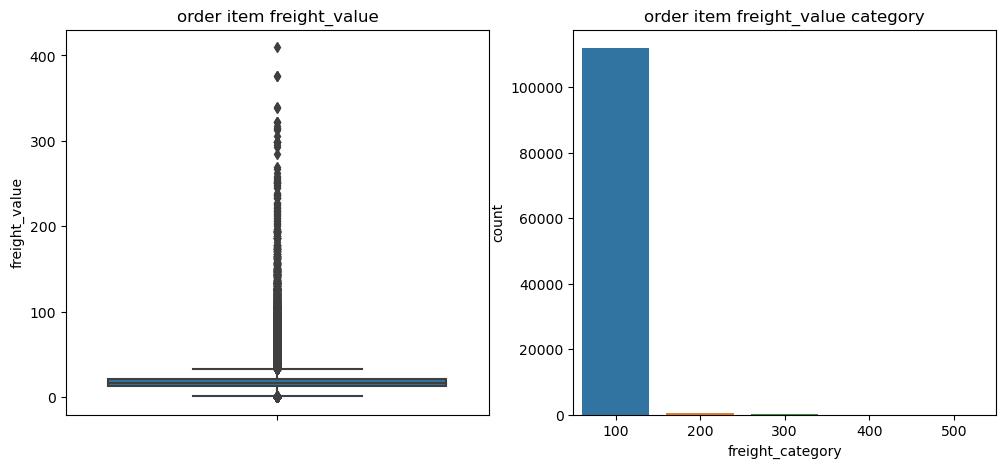

In [ ]:
f, ax = plt.subplots(1,2, figsize=(12,5));
plt.subplot(121)
plt.title('order item freight_value')
draw_boxplot(order_items_df, 'freight_value')
plt.subplot(122)
plt.title('order item freight_value category')
draw_count_graph(order_items_df, 'freight_category')


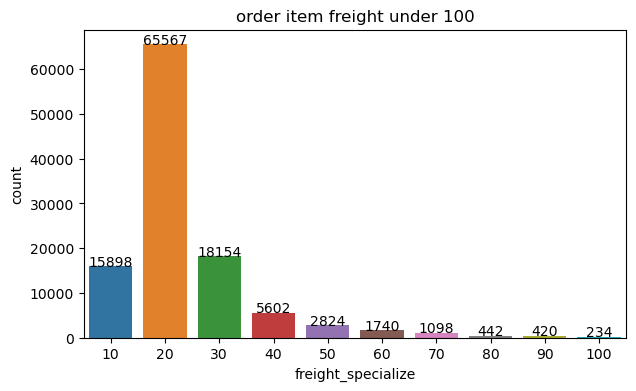

In [ ]:
order = [10,20,30,40,50,60,70,80,90,100]
fig, ax = plt.subplots(figsize=(7,4))
plt.title('order item freight under 100')
sns.countplot(data=order_items_df, x='freight_specialize', order=order);
input_value(ax)

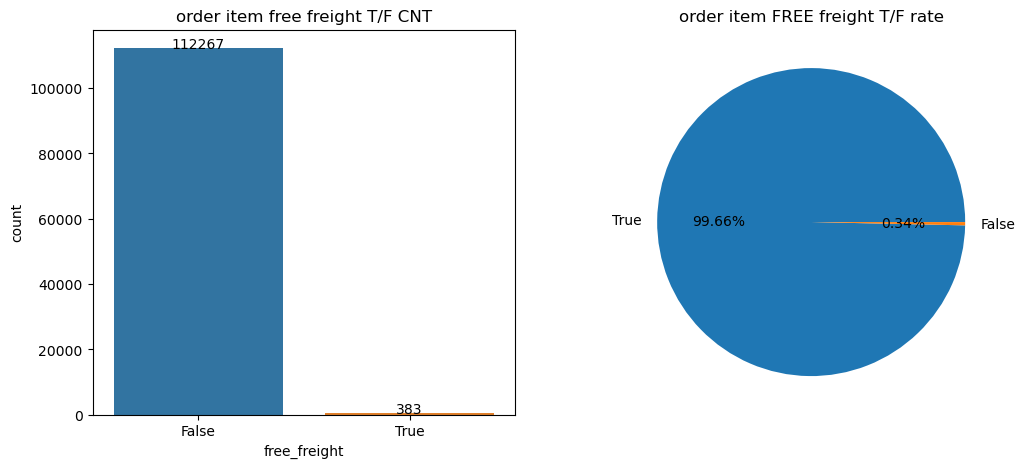

In [ ]:
f, ax = plt.subplots(1,2, figsize=(12,5));
plt.subplot(121)
plt.title('order item free freight T/F CNT')
draw_count_graph(order_items_df, 'free_freight')
input_value(ax[0])

sum_free_yn = order_items_df['free_freight'].value_counts()
ratop_free_yn = sum_free_yn / len(order_items_df['free_freight']) * 100
plt.subplot(122)
plt.title('order item FREE freight T/F rate')
plt.pie(ratop_free_yn,
        labels=[True, False],
        autopct='%.2f%%');

In [ ]:
print('freight_value mean : ', round(order_items_df['freight_value'].mean(), 2))
print('freight_value max : ', order_items_df['freight_value'].max())
print('freight_value min : ', order_items_df['freight_value'].min())

freight_value mean :  19.99
freight_value max :  409.68
freight_value min :  0.0


- 대부분의 제품이 50헤알 이하의 운송료다.
- 100 이하의 운송료가 압도적으로 많다.
- 100 헤알 이하의 운송료에서 세부적으로 보면, 10~20 헤알의 운송료가 가장 많다.
- 무료배송은 0.34%로 매우 적다
- 평균 19.99 헤알이다.
- 최고 운송료 : 409.68 헤알
- 최저 운송료 : 0.0 헤알

### (4) order payments

In [ ]:
# payment_type이 not_defined인 값 삭제. (3건)
order_payments_df = order_payments_df.loc[order_payments_df['payment_type']!='not_defined', :]

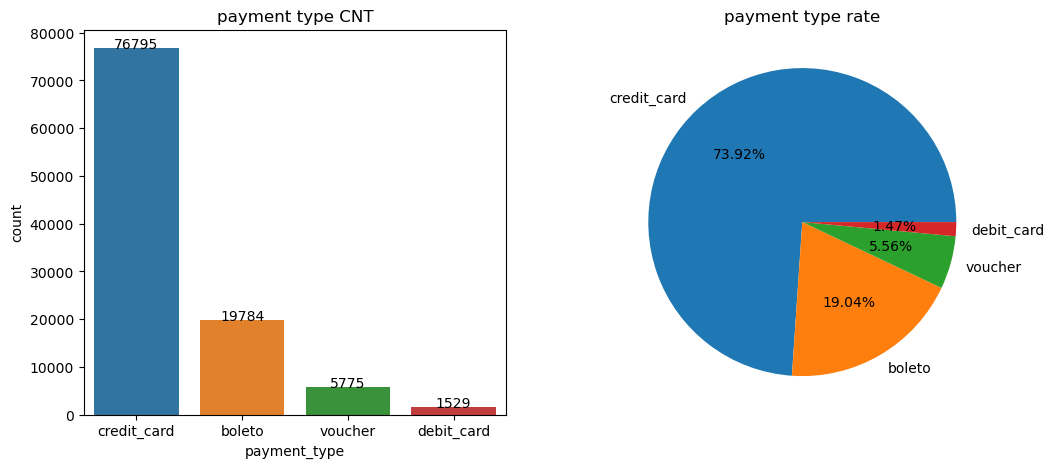

In [ ]:
draw_count_pie(order_payments_df, 'payment_type', 'payment type CNT', 'payment type rate')

- 신용카드 결제가 73.92%로 가장 많다.
- 그 다음으로는 볼레토라는 브라질의 결제 방법이 많다.

In [ ]:
payment_type_df = order_payments_df.groupby('payment_type')['payment_value'].agg(['sum', 'mean'])
payment_type_df

,sum,mean
payment_type,,
boleto,2869361.27,145.034435
credit_card,12542084.19,163.319021
debit_card,217989.79,142.570170
voucher,379436.87,65.703354


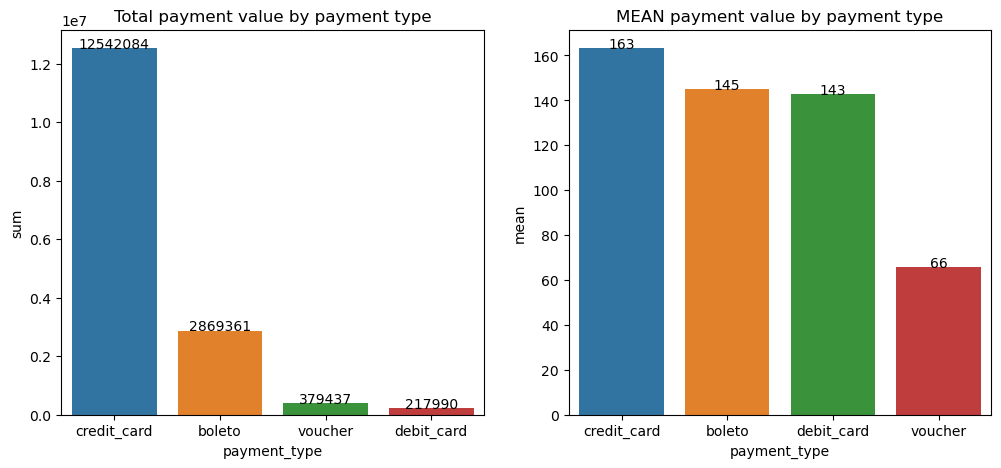

In [ ]:
f, ax = plt.subplots(1,2, figsize=(12,5));
order_list = payment_type_df['sum'].sort_values(ascending=False).index
plt.subplot(121)
plt.title('Total payment value by payment type')
draw_barplot(payment_type_df, 'sum', order_list)
input_value(ax[0])

order_list = payment_type_df['mean'].sort_values(ascending=False).index
plt.subplot(122)
plt.title('MEAN payment value by payment type')
draw_barplot(payment_type_df, 'mean', order_list)
input_value(ax[1])

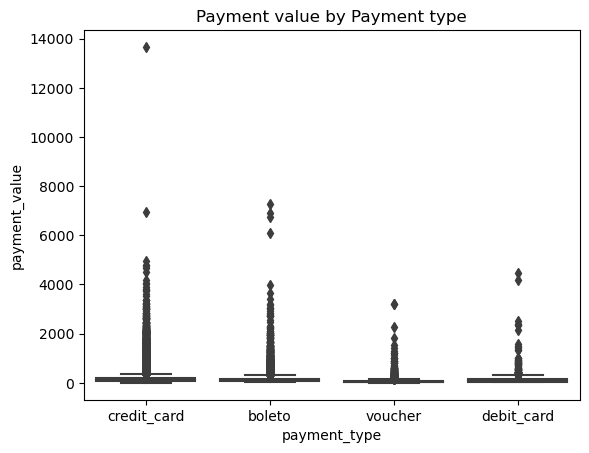

In [ ]:
plt.title('Payment value by Payment type')
sns.boxplot(order_payments_df, x='payment_type', y='payment_value');

- 결제방법 별 결제금액 합과 평균
- 신용카드로 결제할 때 평균금액이 가장 크다.
- 바우처로 결제할 때 평균금액이 가장 낮다.

In [ ]:
credit_card_df = order_payments_df[order_payments_df['payment_type']=='credit_card']
# payment_installments가 0인 행 제외 (2건)
credit_card_df = credit_card_df[credit_card_df['payment_installments']!=0]

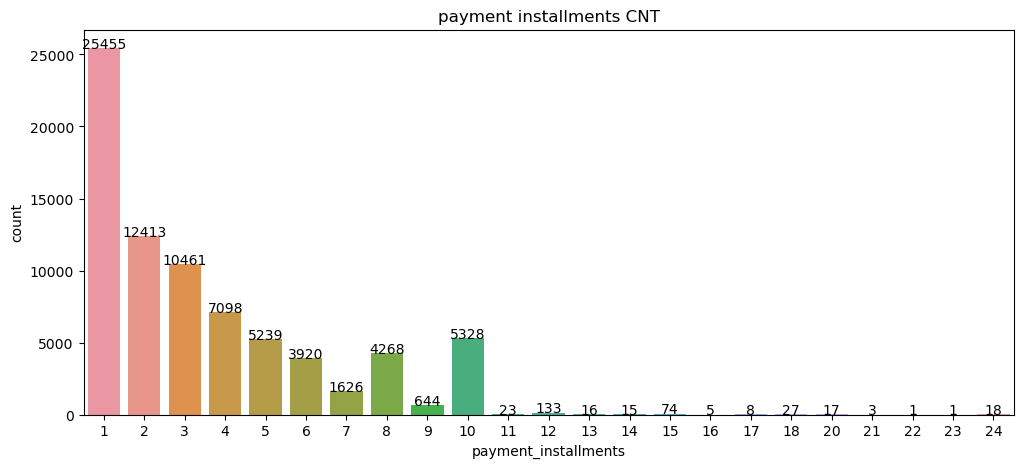

In [ ]:
f, ax = plt.subplots(figsize=(12,5));
plt.title('payment installments CNT')
draw_count_graph_base(credit_card_df, 'payment_installments')
input_value(ax)

- 신용카드로 결제 시, 일시불이 가장 많다.

### (5) order reviews

In [ ]:
order_reviews_df.loc[order_reviews_df['review_score']>3, 'P/N'] = 'Positive'
order_reviews_df.loc[order_reviews_df['review_score']<3, 'P/N'] = 'Negative'
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,P/N
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,Positive
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,Positive
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,Positive
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,Positive
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,Positive
...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,Positive
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,Positive
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,Positive
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,Positive


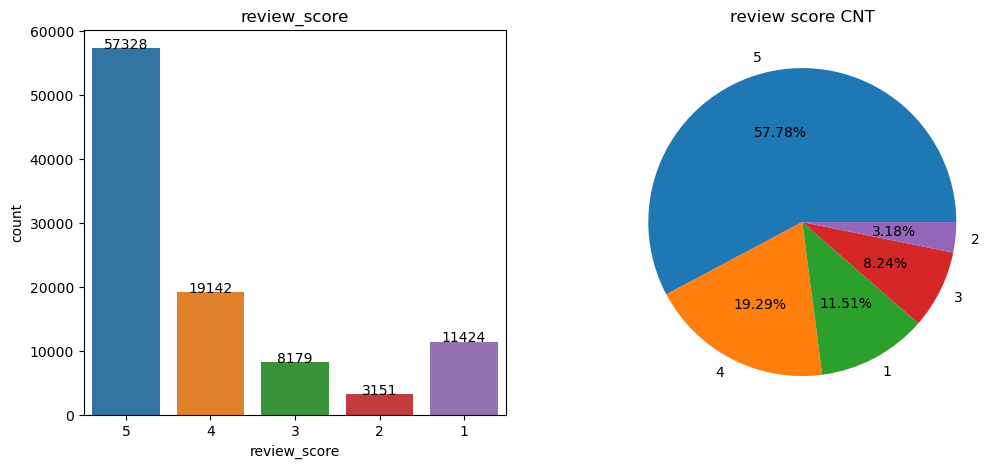

In [ ]:
order_list = [5,4,3,2,1]
f, ax = plt.subplots(1,2, figsize=(12,5));
plt.subplot(121)
plt.title('review_score')
sns.countplot(data=order_reviews_df, x='review_score', order=order_list);
input_value(ax[0])

sum_cnt = order_reviews_df['review_score'].value_counts()
rate_cnt = sum_cnt / len(order_reviews_df['review_score']) * 100
plt.subplot(122)
plt.title('review score CNT')
plt.pie(rate_cnt,
        labels=rate_cnt.index,
        autopct='%.2f%%');

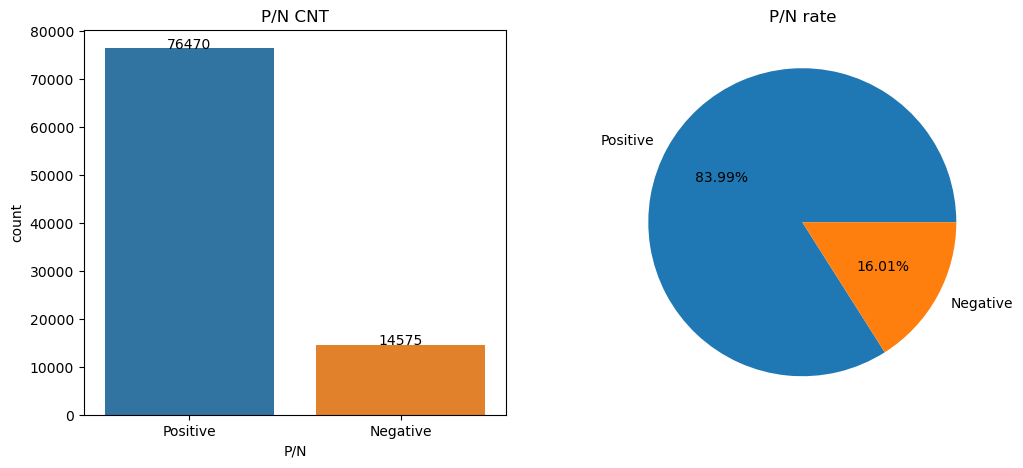

In [ ]:
# 긍정:4~5점, 부정:1~2점
pn_reviews_df = order_reviews_df[order_reviews_df['P/N'].notna()]
draw_count_pie(pn_reviews_df, 'P/N', 'P/N CNT', 'P/N rate')

- 최고점 5점이 57.78%로 가장 많다.
- 최저점 1점이 11.51%로 세 번째로 많다.
- 긍정 83.99%, 부정 16.01%다.

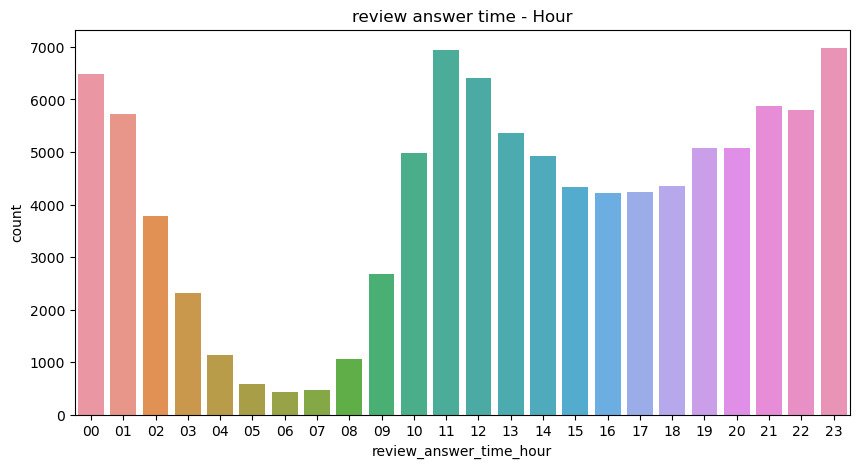

In [ ]:
order_reviews_df['review_answer_time_hour'] = order_reviews_df['review_answer_timestamp'].str[-8:-6]
order_list = order_reviews_df['review_answer_time_hour'].unique()
order_list.sort()
plt.figure(figsize=(10,5))
plt.title('review answer time - Hour')
draw_count_graph_order(order_reviews_df, 'review_answer_time_hour', order_list)

- 정오와 자정에 가장 많은 리뷰를 작성한다.

In [ ]:
reviews_content_df = order_reviews_df[order_reviews_df['review_comment_message'].notna()]

for idx, row in reviews_content_df.iterrows():
    tmp = row['review_comment_message'].lower() # 리뷰 내용 모두 소문자로 변경
    tmp = tmp.replace(".", "")    # ".", ",", "'" 제거
    tmp = tmp.replace(",", "")
    tmp = tmp.replace("'", "")
    reviews_content_df.loc[idx, 'review_comment_message'] = tmp

In [ ]:
word_list = []
for idx, row in reviews_content_df.iterrows():
    words = row['review_comment_message'].split()
    for word in words:
        word_list.append(word)

words_df = pd.DataFrame(word_list)
words_df['Count'] = 1
words_df.rename(columns={0:'Word'}, inplace=True)

words_pivot = pd.pivot_table(data=words_df, index=['Word'], values=['Count'], aggfunc='sum')
words_pivot.sort_values(by='Count', ascending=False, inplace=True)
words_pivot.reset_index(inplace=True)

In [ ]:
#!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 29.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 9.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=d4dbb51a24fbaeaea7d92e5562ecd29014f1c6aa7e24d7023ea5413aa37e2a7a
  Stored in directory: /Users/nayoung/Library/Caches/pip/wheels/a9/25/af/715361fa79594524c89c75d293def652045f3fdce6ca398712
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0

In [ ]:
# 포르투갈어 -> 한국어 번역
import googletrans
from tqdm import tqdm

words_pivot = words_pivot.head(1000)
words_pivot['Word_kor'] = ''
translator = googletrans.Translator()

for idx, row in tqdm(words_pivot.iterrows()):
    try:
        tmp = row['Word']
        result = translator.translate(tmp, dest='ko').text
        words_pivot.loc[idx, 'Word_kor'] = result
    except:
        words_pivot.loc[idx, 'Word_kor'] = ''
words_pivot

0it [00:00, ?it/s]

1000it [17:46,  1.07s/it]


,Word,Count,Word_kor
0,o,18708,영형
1,produto,17886,제품
2,e,15648,이자형
3,a,12147,ㅏ
4,de,11305,~의
...,...,...,...
995,ai,36,일체 포함
996,informa,36,정보
997,voces,36,너
998,serviu,36,봉사


In [ ]:
# 제거해야할 단어가 너무 많아, 직접 상위부터 유용한 단어 200개 고름
top200_list = ['제품', '배달', '전달','추천합니다', '좋은', '품질', '구입', '좋아 했어요', '훌륭한', '엄청난',
               '빠른', '완벽한', '사용', '포장 된', '우편', '데이터', '좋아요', '서비스', '문제', '다른',
                '만족하는', '가격', '대기 중', '화물', '회사', '속도', '상품', '파는 사람', '사진', '재료',
                '시간', '작은', '받다', '시계', '포장', '더 나은', '상자', '상태', '백화점', '용기',
                '감사해요', '나는 기다립니다', '구입했다', '기대', '부족', '지연', '응답', '결함', '잘못된', '원래의',
                '고객', '오늘', '도착합니다', '반품', '문제', '먹었다', '돈', '선물', '발표', '뚜렷한',
                '결합', '없음', '필요한', '외모', '존재', '정황', '지연', '쇼핑', '설명', '크기',
                '규정', '효과가있다', '단위', '월', '합의', '부분', '넓은', '너와 함께', '쉬운', '주문하다',
                '놓쳤다', '증거', '영화', '시간', '만족', '같은', '동일한', '완료', '덜', '너무 많은',
                '매트', '부속', '주', '사용', '잘 아는', '극복', '탄약통', '카드', '이메일', '조직',
                '조직', '공급 업체', '제거', '존경', '의자', '효율적인', '항목', '모두', '재고', '고장난',
                '영상', '나눠 주었다', '발표', '학교 가방', '상표', '휴대 전화', '약속', '확실성', '수동', '믿을 수 있는',
                '예측', '불평', '좋아요', '딸', '부서지기 쉬운', '해결책', '정보', '100%', '함께', '맨 위',
                '상태', '일하다', '관계', '주목', '기대', '부분', '요청', '파트너', '방법', '수행',
                '전화', '반전', '유형', '동기', '계정', '프로세스', '일부', '연령', '성취', '소비자',
                '간단히', '운송 회사', '추적', '터무니없는', '비용이 많이 듭니다', '그것은 효과가있었습니다', '견딜 수 없는', '결정적인', '의견', '많은 다른',
                '대피소', '아들', '거주', '로고', '선전', '향수', '오후', '유리', '평가', '검은색',
                '낮은', '요청', '불만족', '작은', '간단한', '취소', '신뢰하다', '빛', '혜택', '시트',
                '시간 엄수', '감사합니다', '장소', '영수증', '고객', '진실', '수건', '여러 개의', '합법적인', '종이',
                '수송', '조립하기', '잉크', '저렴한', '주의 깊은', '인쇄기', '고장난', '사람', '추적', '미국의']


In [ ]:
cnt_list = []
check_list = []
for idx, row in words_pivot.iterrows():
    if row['Word_kor'] in top200_list:
        cnt_list.append([idx, row['Count'], row['Word_kor']])
    else :
        check_list.append([idx, row['Word_kor']])

In [ ]:
data = {}
for info in cnt_list:
    data[info[2]] = info[1]

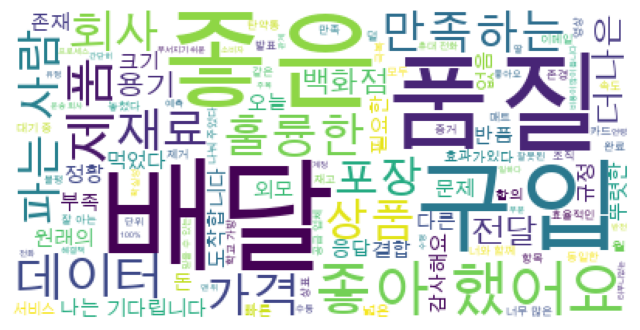

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    font_path="/Library/Fonts/Arial Unicode.ttf",
    relative_scaling=0.2,
    background_color="white"
).generate_from_frequencies(data)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### (6) orders

In [ ]:
orders_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [ ]:
print('order_id', len(orders_df['order_id'].unique()))
print('customer_id', len(orders_df['customer_id'].unique()))

order_id 99441
customer_id 99441


- 한 회원당 주문 1번씩 했다.

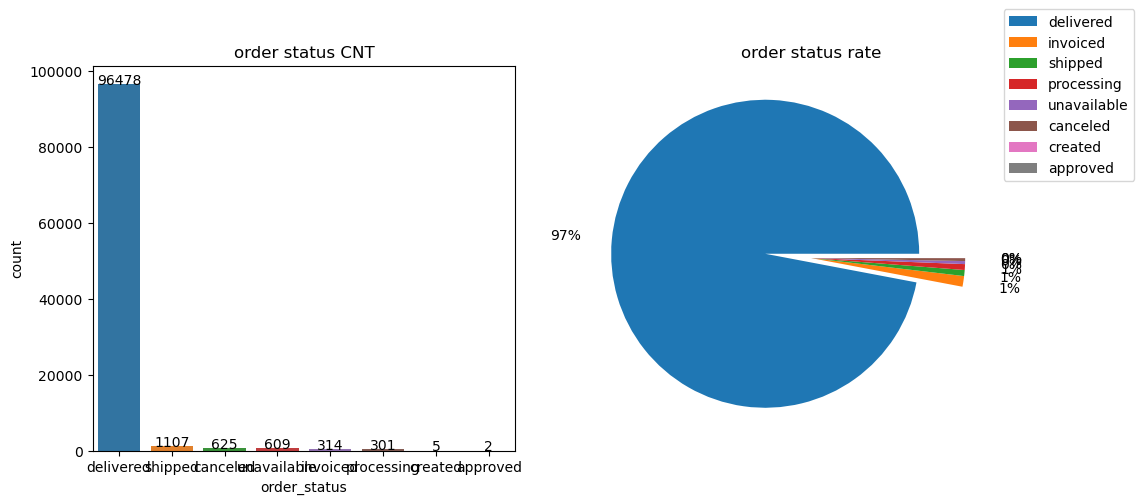

In [ ]:
f, ax = plt.subplots(1,2, figsize=(12,5));
plt.subplot(121)
plt.title('order status CNT')
draw_count_graph(orders_df, 'order_status')
input_value(ax[0])

sum_cnt = orders_df['order_status'].value_counts()
rate_cnt = sum_cnt / len(orders_df['order_status']) * 100
labels=orders_df['order_status'].unique()
plt.subplot(122)
plt.title('order status rate')
pie = plt.pie(rate_cnt,
        autopct='%.0f%%',
        explode=(0.3,0,0,0,0,0,0,0),
        pctdistance=1.3,
        textprops={'fontsize':10});
plt.legend(pie[0],labels, loc=(1, 0.7))

- delivered가 97.02%로 압도적으로 많다.

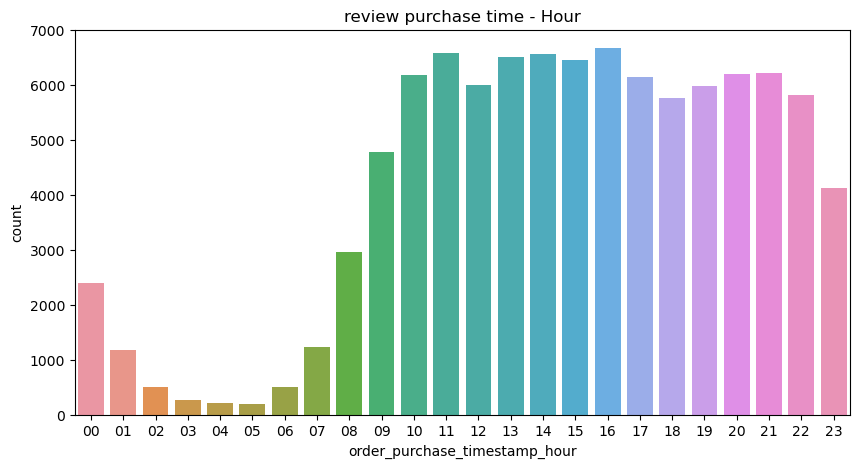

In [ ]:
orders_df

orders_df['order_purchase_timestamp_hour'] = orders_df['order_purchase_timestamp'].str[-8:-6]
order_list = orders_df['order_purchase_timestamp_hour'].unique()
order_list.sort()
plt.figure(figsize=(10,5))
plt.title('review purchase time - Hour')
draw_count_graph_order(orders_df, 'order_purchase_timestamp_hour', order_list)

- 자정 ~ 오전5시까지 구매율이 점점 낮아진다.
- 오전 10시 ~ 밤 10시에 구매율이 가장 많다.

### (7) products

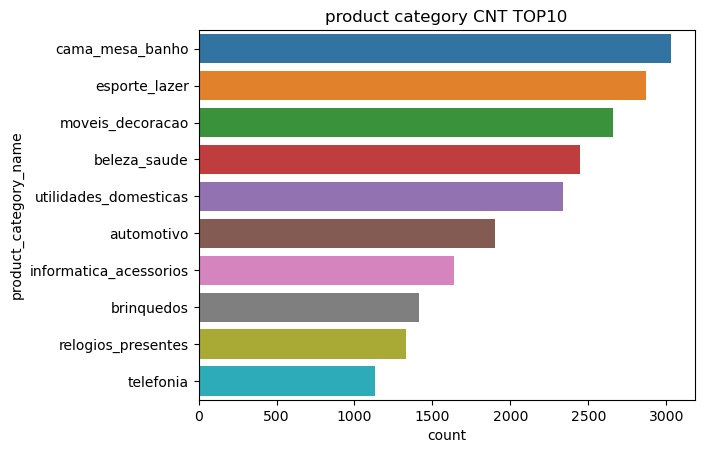

In [ ]:
plt.title('product category CNT TOP10')
draw_count_graph_y_top10(products_df, 'product_category_name')

- 침대 테이블 목욕, 스포츠 레저, 가구 장식, 미용과 건강, 가정용품, 자동차, 컴퓨터 액세서리, 장난감, 선물 시계, 전화 통신 카테고리 순서로 제품이 많다.

### (8) sellers

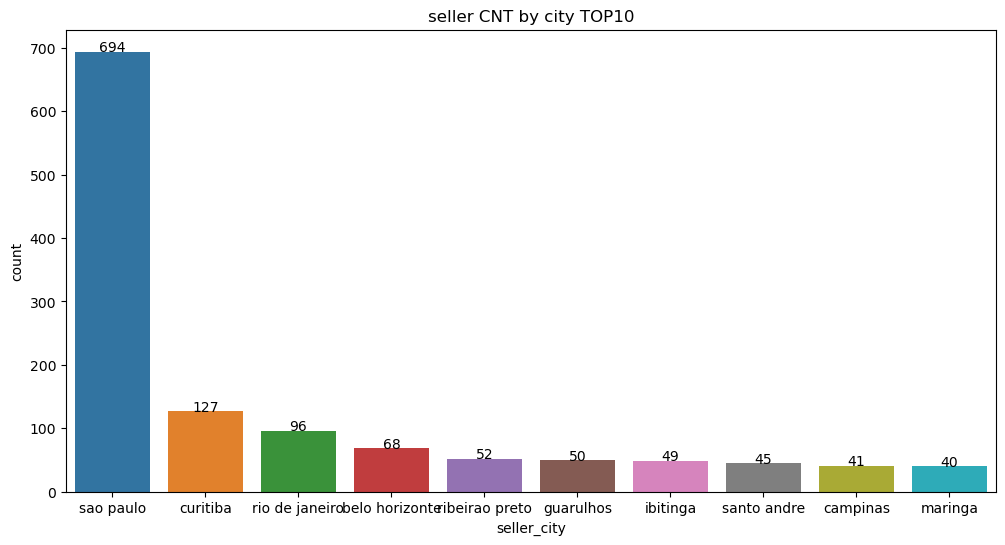

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title('seller CNT by city TOP10')
draw_count_graph_top10(sellers_df, 'seller_city')
input_value(ax)

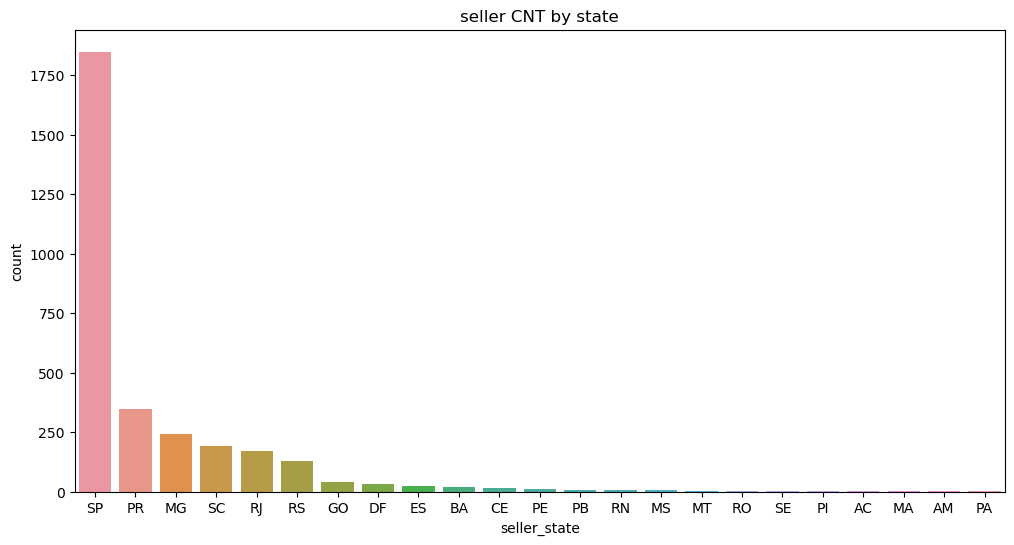

In [ ]:
plt.figure(figsize=(12,6))
plt.title('seller CNT by state')
draw_count_graph(sellers_df, 'seller_state')


- 상파울로에 판매자가 가장 많다.

### (9) category

In [ ]:
category_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


### 3) 지역별
- order_reviews_df에 지역 추가

In [ ]:
customerId = list(custoemrs_df['customer_id'])
customerState = list(custoemrs_df['customer_state'])

customer_geo_dict = dict(zip(customerId, customerState))

In [ ]:
orders_df['state'] = ''
for key, value in tqdm(customer_geo_dict.items()):
    orders_df.loc[orders_df['customer_id']==key, 'state'] = value


  0%|          | 0/99441 [00:00<?, ?it/s]

100%|██████████| 99441/99441 [05:15<00:00, 315.09it/s]


In [ ]:
orderId = list(orders_df['order_id'])
orderState = list(orders_df['state'])

order_geo_dict = dict(zip(orderId, orderState))

In [ ]:
order_reviews_df['state'] = ''
for key, value in tqdm(order_geo_dict.items()):
    order_reviews_df.loc[order_reviews_df['order_id']==key, 'state'] = value

100%|██████████| 99441/99441 [05:15<00:00, 315.21it/s]


In [ ]:
order_reviews_df['nation'] = 'brazil'
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,state,nation
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,SP,brazil
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,SP,brazil
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,BA,brazil
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,SC,brazil
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,SC,brazil


In [ ]:
#order_reviews_df2 = order_reviews_df2.drop(['Unnamed: 0'], axis=1)
order_reviews_df2.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,state,nation
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,SP,brazil
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,SP,brazil


### 리뷰 키워드 분석

In [ ]:
import googletrans
from tqdm import tqdm

# 리뷰 포르투갈어 -> 한국어 번역
order_reviews_df2['review_comment_message_kor'] = ''
translator = googletrans.Translator()

# 전체로 나중에 다시 해보기
for idx, row in tqdm(order_reviews_df2.iterrows()):
    comment = row['review_comment_message']
    if pd.isna(comment):
        pass
    else:
        try:
            result = translator.translate(comment, dest='ko').text
            order_reviews_df2.loc[idx, 'review_comment_message_kor'] = result
        except:
            pass
order_reviews_df2

0it [00:00, ?it/s]

99224it [19:30:30,  1.41it/s]


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,state,nation,review_comment_message_kor
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,SP,brazil,
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,SP,brazil,
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,BA,brazil,
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,SC,brazil,마감일 전에 잘 받았습니다.
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,SC,brazil,축하합니다 Lannister Stores 나는 인터넷을 구매하는 것을 좋아했습니다.
...,...,...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,GO,brazil,
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,RJ,brazil,
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,MG,brazil,"우수한 배낭, 매우 빠른 배송.이 가게를 추천합니다!"
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,MG,brazil,


In [ ]:
order_reviews_df2.to_csv('../data/olist_reviews_to_kor.csv')

In [ ]:
#order_reviews_df2.drop(['reivew_nouns'], axis=1, inplace=True)
order_reviews_df2.tail(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,state,nation,review_comment_message_kor
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,MG,brazil,
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49,SP,brazil,내 제품이 도착했고 이미 결함이 없기 때문에 이미 돌아와야합니다.


In [ ]:
from konlpy.tag import Kkma
kkma = Kkma()
order_reviews_df2['review_nouns'] = ''

for idx, row in tqdm(order_reviews_df2.iterrows()):
    comment = row['review_comment_message_kor']
    if comment == '':
        pass
    else:
        words_list = kkma.nouns(comment)
        words = str(words_list)[1:-1]
        order_reviews_df2.loc[idx, 'review_nouns'] = words

0it [00:00, ?it/s]

99224it [04:23, 376.72it/s]


In [ ]:
order_reviews_df2['review_nouns'] = order_reviews_df2['review_nouns'].str.replace("'", '')
order_reviews_df2.tail(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,state,nation,review_comment_message_kor,review_nouns
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,MG,brazil,,
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49,SP,brazil,내 제품이 도착했고 이미 결함이 없기 때문에 이미 돌아와야합니다.,"내, 제품, 도착, 결함, 때문"


In [ ]:
df = order_reviews_df2.copy()

In [ ]:
state_list = list(df['state'].unique())
for state in tqdm(state_list):
    tmp_df = df[df['state']==state]
    globals()["word_list_{}".format(state)] = []
    for idx, row in tmp_df.iterrows():
        words = row['review_nouns'].split(',')
        for word in words:
            if word != '':
                word = word.replace(' ', '')  # 공백 제거
                globals()["word_list_{}".format(state)].append(word)
    globals()["word_df_{}".format(state)] = pd.DataFrame(globals()["word_list_{}".format(state)])
    globals()["word_df_{}".format(state)]['Count'] = 1
    globals()["word_df_{}".format(state)].rename(columns={0:'Word'}, inplace=True)

    globals()["word_pivot_{}".format(state)] = pd.pivot_table(data=globals()["word_df_{}".format(state)],
                                                              index=['Word'],
                                                              values=['Count'],
                                                              aggfunc='sum')
    globals()["word_pivot_{}".format(state)].sort_values(by='Count', ascending=False, inplace=True)
    globals()["word_pivot_{}".format(state)].reset_index(inplace=True)
    globals()["word_pivot_{}".format(state)]['state'] = state

    total_words_df = pd.concat([total_words_df, globals()["word_pivot_{}".format(state)]])

100%|██████████| 27/27 [00:02<00:00, 11.96it/s]


In [ ]:
total_words_df = total_words_df.reset_index()
total_words_df

,index,state,Word,Count
0,0,SC,나는,328
1,1,SC,매우,163
2,2,SC,제품은,134
3,3,SC,마감일,125
4,4,SC,제품을,123
...,...,...,...,...
140285,79,AP,양질,1
140286,80,AP,어려움,1
140287,81,AP,엄수,1
140288,82,AP,결정,1


In [ ]:
# 한 state 당 단어 최대 200개 저장
total_words_df = total_words_df[total_words_df['index']<=200]
total_words_df

,index,state,Word,Count
0,0,SC,나는,328
1,1,SC,매우,163
2,2,SC,제품은,134
3,3,SC,마감일,125
4,4,SC,제품을,123
...,...,...,...,...
140285,79,AP,양질,1
140286,80,AP,어려움,1
140287,81,AP,엄수,1
140288,82,AP,결정,1


In [ ]:
total_words_df.to_csv('../data/total_review_words_final.csv')